**Librerias base para redes neuronales**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets


**Cargar datos**

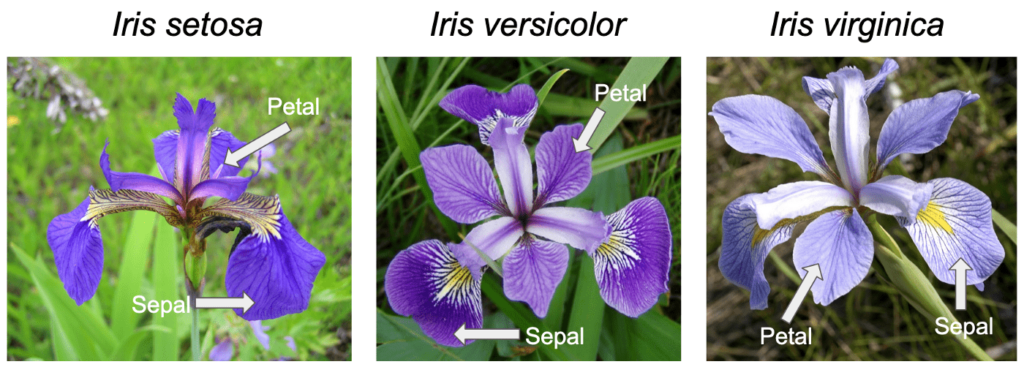

In [2]:
X, y = datasets.load_iris(return_X_y=True, as_frame=True)
y.unique()

array([0, 1, 2])

In [ ]:
#Propiedades de flores
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
print("Cantidad de flores:"+str(len(X)))

Cantidad de flores:150


In [4]:
# Y guarda las clases de flores
y.unique() #Las clases existentes

array([0, 1, 2])

**Separacion de datos en entrenamiento (train) y prueba (test)**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [6]:
print("Cantidad de flores para entrenamiento:"+str(len(X_train)))

Cantidad de flores para entrenamiento:120


**Diseño de la red neuronal**

In [23]:
# First, we initialize the model.
model = tf.keras.models.Sequential()

In [24]:
# First our input layer. For this layer, and this layer only, we need to specify the size of our input. For our dataset this means the amount of columns in our X.
model.add(tf.keras.layers.Dense(4, activation=tf.nn.tanh, input_shape=(X.shape[1],)))
# Now some hidden layers
model.add(tf.keras.layers.Dense(10, activation=tf.nn.tanh))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.tanh))
# Finally, our output layer. Since we have 3 possible classes, we need 3 output neurons.
# For a regression problem, we would have only 1. For an image creation network, we would have as many pixels as the image we wanted to create!
model.add(tf.keras.layers.Dense(3))
# A final layer with several output neurons gives us logits as results.
#We can do a final pass with a Softmax layer to turn them into percentages.
model.add(tf.keras.layers.Softmax())

In [25]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=optim,metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train.values, y_train.values,
        validation_data=(X_test.values, y_test.values),
        epochs = 20,
        batch_size=32)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.1642 - loss: 1.1530 - val_accuracy: 0.3000 - val_loss: 1.1015
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3808 - loss: 1.0917 - val_accuracy: 0.4667 - val_loss: 1.0639
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4092 - loss: 1.0542 - val_accuracy: 0.3667 - val_loss: 0.9965
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4942 - loss: 0.9929 - val_accuracy: 0.8333 - val_loss: 0.8779
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6675 - loss: 0.8776 - val_accuracy: 0.6333 - val_loss: 0.7379
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6508 - loss: 0.7180 - val_accuracy: 0.8333 - val_loss: 0.5948
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8808 - loss: 0.5887 - val_accuracy: 0.8333 - val_loss: 0.4987
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8067 - loss: 0.5139 - val_accuracy: 0.8667 - val_loss: 0.4453


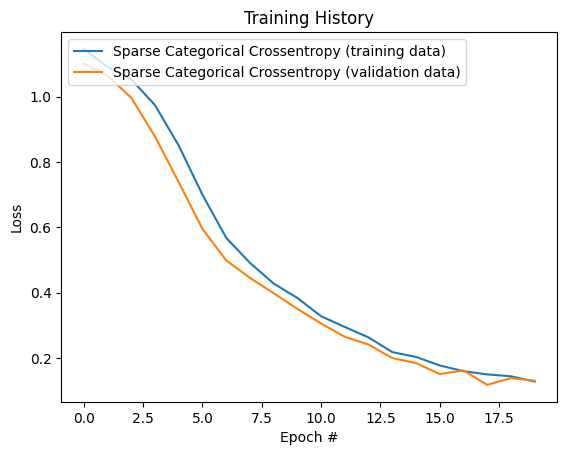

In [28]:
plt.plot(history.history['loss'], label='Sparse Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Sparse Categorical Crossentropy (validation data)')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()


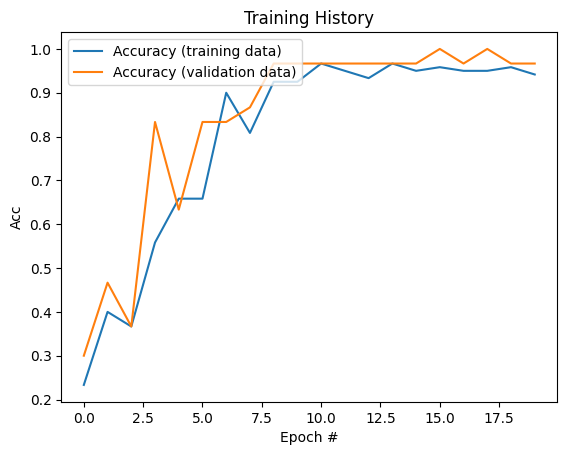

In [29]:
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Training History')
plt.ylabel('Acc')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()

In [14]:
model.predict(X_test[:1])

#10: Ver el desempeño
predictions = model.predict(X_test)
for idx, prediction in enumerate(predictions):
    print('We predict: '+str(np.argmax(prediction))+'. Real Species was: '+str(y_test.iloc[idx]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
We predict: 1. Real Species was: 1
We predict: 0. Real Species was: 0
We predict: 2. Real Species was: 2
We predict: 1. Real Species was: 1
We predict: 1. Real Species was: 1
We predict: 0. Real Species was: 0
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 1. Real Species was: 1
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 0. Real Species was: 0
We predict: 0. Real Species was: 0
We predict: 0. Real Species was: 0
We predict: 0. Real Species was: 0
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 1. Real Species was: 1
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 0. Real Species was: 0
We predict: 2. Real Species was: 2
We predict: 0. Real Species was: 0
We predict: 2. Real Species was: 2
We predict: 2. Real Species was: 2
We predict: 2. Real Species was: 2
We predict: 2.